### 7. LightGBM
GBM, XGBoost를 개선한 모델 <br>
1. LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다. 
2. 메모리 사용량도 상대적으로 적다. 
3. 하지만 적은량의 데이터(10,000건)에 대해서는 과적합이 발생할 가능성이 높다. 

일반트리의 경우는 균형트리분할방법을 사용하나, LightGBM의 경우는 **리프중심트리분할**방법을 사용한다. 기존의 균형트리를 기반으로 생성하는 이유는 오버피팅에 보다 더 강한 구조이기 때문이었다. <br>
반면에 LightGBM의 리프중심트리 분할 방식은 트리의 균형을 맞추지 않고 최대 손실값을 가지는 리프노드를 지속적으로 분할하면서 깊이가 깊어지고 비대칭적인 규칙트리가 생성된다는 점이 있다. 

In [2]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [4]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
#데이터셋 준비
dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

In [8]:
#80%는 학습용데이터, 20%는 테스트용 데이터
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

#lightgbm객체의 생성
#앞선 XGBoost와 동일하게 n_estimator는 400으로 설정(반복의 횟수)
lgbm_wrapper=LGBMClassifier(n_estimators=400)

#LightBGM도 XGBoost와 동일하게 조기 중단 수행이 가능하다. 
evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True) #학습
preds=lgbm_wrapper.predict(X_test) #예측

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [9]:
#성능평가 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds) #xgboost의 정확도보단 작은 값을 나타내긴 한다. 

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9330


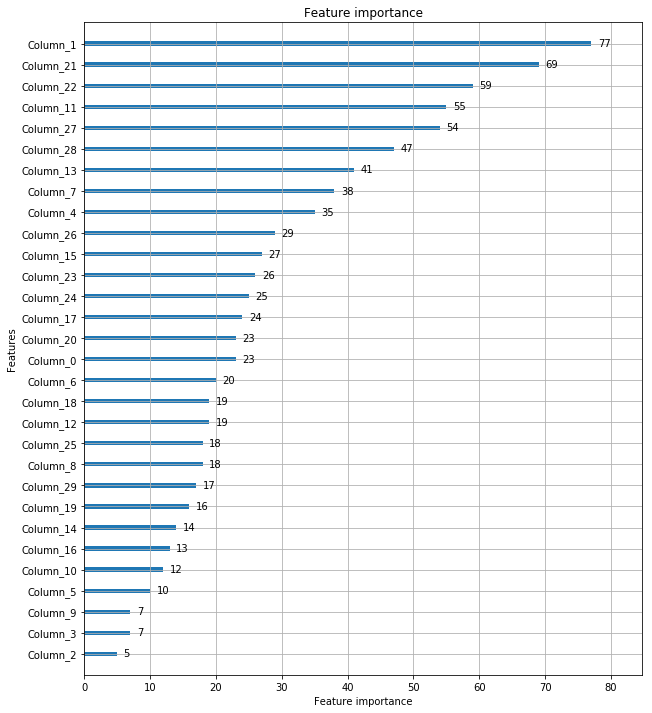

In [11]:
#feature importance
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

### 8. 분류실습 - kaggle 산탄데르 고객만족 예측

1.전체적인 데이터 확인

In [1]:
#데이터 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df=pd.read_csv('train.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.columns #열이름만 전체 확인하기 (TARGET값확인 및 설정)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
#분류이므로, target변수의 value_counts를 확인한다. 
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count() #target==1인 경우의 갯수 
total_cnt=cust_df.TARGET.count() #전체 TARGET의 갯수
print('unsatisfied의 비율',unsatisfied_cnt/total_cnt)

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied의 비율 0.0395685345961589


In [5]:
#각 feature의 분포를 확인한다, 
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3의 min의 경우 매우 작은 값이다. null값을 -999999값으로 대입했는가에 대한 물음표.

In [6]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [7]:
#featureset과 dataset의 분리, 레이블칼럼은 dataframe의 맨 마지막에 위치하도록 분리한다. 
X_features=cust_df.iloc[:,:-1] #마지막열을 제외한 모든 열을 가져온다. 
y_labels = cust_df.iloc[:,-1] #마지막 열을 제외하고 가져온다 
print('feature data shape:{0}'.format(X_features.shape))

feature data shape:(76020, 369)


In [8]:
#학습성능과 평가를 위해 학습데이터와 평가 데이터로 분리한다. 
#비대칭 데이터셋이므로 클래스인 TARGET값의 분포도가 학습 데이터, 평가 데이터에서 비슷하게 추출되었는지를 확인한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

#레이블값 분포확인 위함 
train_cnt=y_train.count()
test_cnt=y_test.count()
print('학습 데이터셋 Shape {0}, 테스트 셋 Shape {1}'.format(X_train.shape, X_test.shape))

print('학습셋 레이블 값 분포의 비율')
print(y_train.value_counts()/ train_cnt)
print('테스트셋 레이블 값 분포의 비율')
print(y_test.value_counts()/test_cnt) #원본과 유사한 분포의 TARGET value가 만들어짐을 볼 수가 있다. 

학습 데이터셋 Shape (60816, 369), 테스트 셋 Shape (15204, 369)
학습셋 레이블 값 분포의 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트셋 레이블 값 분포의 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


2. XGBoost모델 학습과 하이퍼파라미터 튜닝

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimators 는 500으로, random_sate는 예제마다 동일한 결과를 위해 설정함
xgb_clf=XGBClassifier(n_estimator=500, random_state=156) #반복수를 설정

#성능평가 지표를 auc로, 조기중단 파라미터는 100으로 설정하고 학습을 수행한다. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:1],average='marco') #test, prediction값 대입
print('roc auc', xgb_roc_score)

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

ValueError: average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')

In [15]:
#하이퍼파라미터 튜닝
#column의 수가 많으므로 과적합을 가정한다. 따라서 max_depth, min_child_weight, colsample_bytree를 조정한다. 
#GridSearchCV를 사용하면 시간이 많이 걸리므로 먼저 2~3개의 파라미터를 결합하여 찾아내고, 다시 1~2개를 결합하는 형식을 차용
#또 GridSearchCV의 CV를 지정하지 않아 반복의 횟수를 줄여 빠르게 튜닝이 가능하게 한다. 
from sklearn.model_selection import GridSearchCV

#하이퍼파라미터 테스트의 수행속도 향상을 위해 n_estimator를 100으로 감소한다. 
xgb_clf=XGBClassifier(n_estimators=100)
params={'max_depth':[5,7], ',min_child_weigth':[1,3],'colsample_bytree':[0.5, 0.75]}

```python
#하이퍼파라미터 테스트의 수행속도 향상을 위해 cv는 설정하지 않는다. 
#노트북기준 걸리는시간 15분 
gridcv=GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metrics='auc', eval_set=[(X_train, y_trsin), (X_test, y_test)])
print('GridSearchCV 최적의 파라미터', gridcv.best_params_)

#성능평가 
xgb_roc_auc=roc_auc_score(y_test, gridcv.predict_proba(X_test[:1],average='marco'))
print('roc auc',xgb_roc_auc )
```

```python
#앞에서 구한 최적화 하이퍼파라미터를 기반으로 다른 하이퍼파라미터를 변경, 추가하여 튜닝하는 경우
#주의할점은 hyperparamter는 항상 모델객체 선언시에 넣어준다는 의미이다. 
xgb_clf=XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,
                     min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

#성능평가지표를 auc로, 조기중단 파라미터걊은 200으로 조정하여 튜닝하는 경우
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_test, y_test)]) #앞의 튜닝결과로 학습

#auc로 평가
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
```

XGBoost도 GDM기반으로 된 알고리즘이기 때문에 기본적으로 수행속도는 느리다고 본다. 또한 앙상블 계열 알고리즘에서 하이퍼파라미터튜닝으로 성능추치 개선이 급격하게 되는 경우는 그렇게 많지 않다. 왜냐하면 앙상블 계열 알고리즘은 과적합이나 잡음에 기본적으로 뛰어난 알고리즘이기 때문이다. 

```python
#튜닝된 모델에서 각 피처의 중요도를 나타내는 경우 
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)
```

3. LightGBM 모델 학습과 하이퍼파라미터의 튜닝

In [19]:
#앞의 xgboost와 동일하게 n_estimators는 500으로, early_stopping_rounds=100, eval_metirc은 평가, 테스트셋으로 구성
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=500) #반복의 수를 지정한 lightgbm객체를 생성
evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_auc=roc_auc_score(y_test,lgbm_clf.predict(X_test)[:1], average='marco')
print('roc auc', lgbm_roc_auc) #83%

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408


ValueError: average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')

```python
#GridSearchCV로 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

#하이퍼파라터의 수행속도 향상을 위해 n_estimaotr=200으로 감소
LGBM_clf=LGBMClassifier(n_estimators=200)

#성능조절할 하이퍼파라미터의 조정
params={'num_leaves':[32,64],
       'max_depth':[128,160],
       'min_child_samples':[60,100],
       'subsample':[0.8, 1]}

#하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
```

```python
#해당 하이퍼파라미터를 적용하여 다시 학습하여 roc_auc를 도출한다. 
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))  #84%
```